# Simple analysis on data (NEED MORE TO BE DONE)
titles and xlabel, ylabel will be added sometime

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt 

In [3]:
spark = (
    SparkSession.builder.appName("preprocessing of taxi data")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "15g")
    .getOrCreate()
)

22/09/08 14:37:42 WARN Utils: Your hostname, kams-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.13.106.132 instead (on interface en0)
22/09/08 14:37:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/08 14:37:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
transaction_20210228_20210827_sdf = spark.read.parquet("../data/curated/transactions_20210228_20210827_all_details")
transaction_20210228_20210827_missings_sdf = spark.read.parquet("../data/curated/transactions_20210228_20210827_all_details_missing_counts")
transaction_20210828_20220227_sdf = spark.read.parquet("../data/curated/transactions_20210828_20220227_all_details")
transaction_20210828_20220227_missings_sdf = spark.read.parquet("../data/curated/transactions_20210828_20220227_all_details_missing_counts")
merchant_sdf = spark.read.parquet("../data/tables/tbl_merchants.parquet")
age_sdf = spark.read.option("header",True).csv("../data/curated/age_5yrs.csv")

In [5]:
transaction_20210228_20210827_missings_sdf.show()

+-------+------------+------------+--------+-------------+---------+-------------+---------+-------------+-------+-----+--------+------+-----------+
|user_id|merchant_abn|dollar_value|order_id|merchant_name|prod_desc|revenue_level|take_rate|consumer_name|address|state|postcode|gender|consumer_id|
+-------+------------+------------+--------+-------------+---------+-------------+---------+-------------+-------+-----+--------+------+-----------+
|      0|           0|           0|       0|       149228|   149228|       149228|   149228|            0|      0|    0|       0|     0|          0|
+-------+------------+------------+--------+-------------+---------+-------------+---------+-------------+-------+-----+--------+------+-----------+



In [23]:
transaction_20210828_20220227_missings_sdf.show()

+-------+------------+------------+--------+-------------+---------+-------------+---------+-------------+-------+-----+--------+------+-----------+
|user_id|merchant_abn|dollar_value|order_id|merchant_name|prod_desc|revenue_level|take_rate|consumer_name|address|state|postcode|gender|consumer_id|
+-------+------------+------------+--------+-------------+---------+-------------+---------+-------------+-------+-----+--------+------+-----------+
|      0|           0|           0|       0|       184414|   184414|       184414|   184414|            0|      0|    0|       0|     0|          0|
+-------+------------+------------+--------+-------------+---------+-------------+---------+-------------+-------+-----+--------+------+-----------+



there are some transactions with unkown merchants (i.e. missing values), need discussion will teammates

In [7]:
transaction_20210228_20210827_sdf.select(F.col("merchant_abn")).distinct().count()

4359

In [8]:
transaction_20210228_20210827_sdf.select(F.col("merchant_name")).distinct().count()

3982

In [10]:
transaction_20210828_20220227_sdf.select(F.col("merchant_abn")).distinct().count()

4379

In [11]:
transaction_20210828_20220227_sdf.select(F.col("merchant_name")).distinct().count()

3999

In [28]:
print(merchant_sdf.select(F.col("merchant_abn")).distinct().count())
print(merchant_sdf.select(F.col("name")).distinct().count())
print(merchant_sdf.count())

4026
4026
4026


as we can see, there is some unknown merchants present in the transaction dataset causing joining to have more unknown values.....

## Analysis, some plot

In [20]:
transaction_20210828_20220227_sdf

user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,prod_desc,revenue_level,take_rate,consumer_name,address,state,postcode,gender,consumer_id
7,71041015148,226.70111326425848,ba1c3c0b-6143-49c...,2021-11-26,Orci Ltd,digital goods: bo...,c,take rate: 2.19,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,14492521225,28.69248621050033,c82c2951-6a2c-4bf...,2021-11-26,Praesent Eu Assoc...,tent and awning s...,c,take rate: 2.50,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,68004106739,93.96901941736229,40d71489-2203-485...,2021-11-26,Nec Ante Ltd,"cable, satellite,...",a,take rate: 5.61,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,34096466752,92.43454448910457,293dc228-8398-49f...,2021-11-29,Nullam Enim Ltd,"computers, comput...",b,take rate: 3.22,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,62773208456,24.606053328805864,918d63ec-d125-43b...,2021-11-29,Ac Institute,"watch, clock, and...",c,take rate: 2.62,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,67874735704,871.400942067755,0dc0a909-7b11-423...,2021-11-29,Ultricies Adipisc...,florists supplies...,c,take rate: 2.04,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,36125151647,22.37653874205458,ebd96051-41c5-44d...,2021-11-29,Sed Nec Corp.,"hobby, toy and ga...",c,take rate: 1.83,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,86578477987,14.932370248640328,b13248d9-3c6d-4b0...,2021-11-29,Leo In Consulting,"watch, clock, and...",a,take rate: 6.43,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,48534649627,16.362338872391526,96a5d5f4-2f24-4c9...,2021-11-29,Dignissim Maecena...,"opticians, optica...",a,take rate: 6.64,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685
7,76767266140,144.7959046161148,734de9e3-dcc1-4da...,2021-11-29,Phasellus At Limited,"furniture, home f...",b,take rate: 4.65,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,511685


<AxesSubplot:>

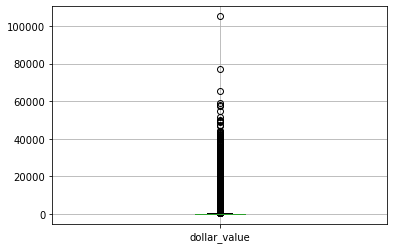

In [19]:
transaction_20210228_20210827_df = transaction_20210228_20210827_sdf.toPandas()
transaction_20210228_20210827_df.boxplot(column=['dollar_value'])

<AxesSubplot:>

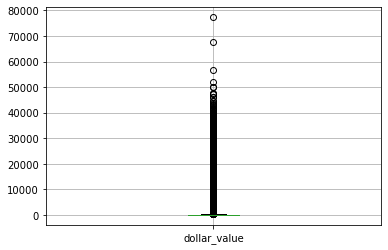

In [21]:
transaction_20210828_20220227_df = transaction_20210828_20220227_sdf.toPandas()
transaction_20210828_20220227_df.boxplot(column=['dollar_value'])

not quite useful, try to aggregate by merchants. but there are missing merchants so just remove them and see first

In [33]:
aggregate_merchant_20210228_20210827_sdf = transaction_20210228_20210827_sdf.na.drop()
aggregate_merchant_20210228_20210827_sdf = aggregate_merchant_20210228_20210827_sdf.groupBy("merchant_abn") \
                                                                                   .agg(F.sum("dollar_value"))
aggregate_merchant_20210228_20210827_sdf.count()

3981

In [34]:
aggregate_merchant_20210828_20220227_sdf = transaction_20210828_20220227_sdf.na.drop()
aggregate_merchant_20210828_20220227_sdf = aggregate_merchant_20210828_20220227_sdf.groupBy("merchant_abn") \
                                                                                   .agg(F.sum("dollar_value"))
aggregate_merchant_20210828_20220227_sdf.count()

3998

make sense, one missing from distinct abn values for each merchant, as we account for NULL.

<AxesSubplot:>

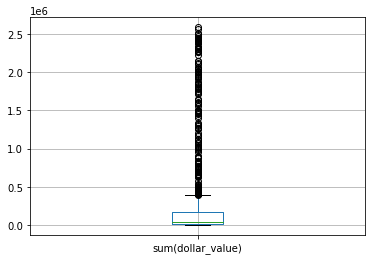

In [55]:
aggregate_merchant_20210228_20210827_df = aggregate_merchant_20210228_20210827_sdf.toPandas()
aggregate_merchant_20210228_20210827_df.boxplot(column=['sum(dollar_value)'])

<AxesSubplot:>

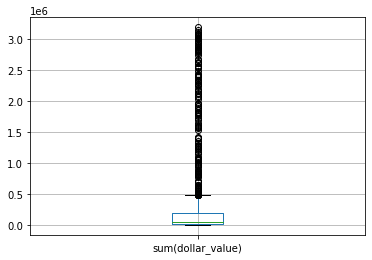

In [56]:
aggregate_merchant_20210828_20220227_df = aggregate_merchant_20210828_20220227_sdf.toPandas()
aggregate_merchant_20210828_20220227_df.boxplot(column=['sum(dollar_value)'])

Still not useful, try to remove outlier, just for better visualisation, not decided yet. Start from 1.5 just to look

<AxesSubplot:>

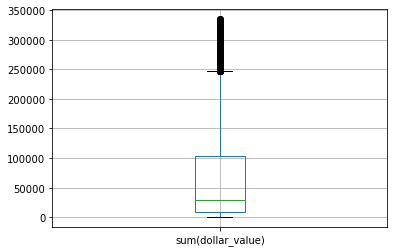

In [60]:
col = ['sum(dollar_value)']

# Calculate quantiles and IQR
Q1 = aggregate_merchant_20210228_20210827_df[col].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = aggregate_merchant_20210228_20210827_df[col].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((aggregate_merchant_20210228_20210827_df[col] < (Q1 - 1.5 * IQR)) | (aggregate_merchant_20210228_20210827_df[col] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_20210228_20210827_df = aggregate_merchant_20210228_20210827_df[condition]
filtered_20210228_20210827_df.boxplot(column=col)

<AxesSubplot:>

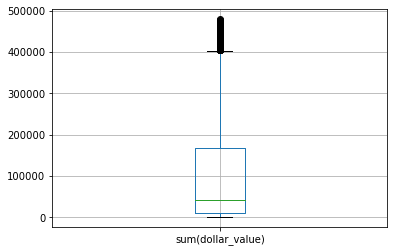

In [61]:
col = ['sum(dollar_value)']

# Calculate quantiles and IQR
Q1 = aggregate_merchant_20210828_20220227_df[col].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = aggregate_merchant_20210828_20220227_df[col].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((aggregate_merchant_20210828_20220227_df[col] < (Q1 - 1.5 * IQR)) | (aggregate_merchant_20210828_20220227_df[col] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_20210828_20220227_df = aggregate_merchant_20210828_20220227_df[condition]
filtered_20210828_20220227_df.boxplot(column=col)

In [9]:
age_sdf

0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90-94 years,95-99 years,100 years and over,Total,postcode
698,292,260,1040,4791,6015,4661,2703,1450,1105,1040,890,780,660,449,268,158,107,40,10,0,27411,2000
0,5,13,556,579,39,13,6,10,7,3,9,4,5,3,3,0,0,0,0,0,1261,2006
198,105,69,704,2737,1783,1067,627,366,274,203,168,165,144,75,68,48,28,13,4,0,8846,2007
208,100,96,974,3610,2552,1476,744,432,367,319,268,202,171,94,53,25,11,10,6,0,11712,2008
606,341,245,277,1154,2016,2070,1446,904,687,679,651,576,497,309,177,104,49,14,0,0,12813,2009
689,402,259,448,2160,5138,4787,3088,2324,1872,1660,1338,1097,867,581,421,309,187,82,18,0,27733,2010
393,217,174,419,1895,3627,3402,2118,1620,1396,1190,1192,952,879,585,385,305,242,133,50,4,21199,2011
553,343,219,220,746,1662,1633,1150,896,712,531,424,316,209,143,70,69,27,10,4,0,9922,2015
467,257,194,272,1172,2182,1877,1200,977,895,809,716,588,520,341,358,218,137,33,3,0,13213,2016
1034,483,312,1507,3853,4707,3862,2170,1302,1058,905,849,699,683,483,355,278,106,38,9,0,24694,2017


In [7]:
age_trans_20210228_20210827_sdf = transaction_20210228_20210827_sdf.join(age_sdf, 
                                                                        transaction_20210228_20210827_sdf.postcode == age_sdf.postcode,
                                                                        "left").drop(age_sdf.postcode)
age_trans_20210228_20210827_sdf

22/09/08 14:43:14 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,prod_desc,revenue_level,take_rate,consumer_name,address,state,postcode,gender,consumer_id,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90-94 years,95-99 years,100 years and over,Total
6,47086412084,17.90949324299599,6f67ccf1-d884-4da...,2021-08-21,Eros Limited,digital goods: bo...,c,take rate: 2.52,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,90651237279,73.91138243216932,372dd90b-f34f-43b...,2021-08-21,Dui Nec Incorporated,antique shops - s...,c,take rate: 1.72,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,22059270846,39.724564457957754,b433fc0d-e64c-457...,2021-08-19,Montes Nascetur R...,"opticians, optica...",a,take rate: 6.59,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,23661821077,3.866733632735169,dd1ba445-4ec9-410...,2021-08-19,Suspendisse Eleif...,computer programm...,c,take rate: 3.00,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,86578477987,42.65932172543647,266ddf4f-f2ef-436...,2021-08-14,Leo In Consulting,"watch, clock, and...",a,take rate: 6.43,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,12543580354,233.63159017043435,6b4fb3de-670f-411...,2021-08-15,Ut Aliquam Corp.,shoe shops,b,take rate: 3.78,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,90543168331,105.0070078856732,08e77989-a13f-432...,2021-08-15,Phasellus Dapibus...,"furniture, home f...",c,take rate: 2.68,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,96152467973,14.242179649705214,0f0f2c74-cd57-454...,2021-07-15,Rhoncus Donec Ass...,tent and awning s...,b,take rate: 4.45,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,79417999332,107.4286241437849,edbcfc4f-fa5b-43b...,2021-07-15,Phasellus At Company,"gift, card, novel...",b,take rate: 4.95,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
6,60956456424,112.20191032646764,d28459f8-e244-453...,2021-07-15,Ultricies Digniss...,"gift, card, novel...",b,take rate: 4.69,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,407340,540,514,411,768,1712,1510,1133,899,677,589,587,472,355,390,296,259,217,160,58,20,0,11573
